# Investigation of ODI Cricket Data

With one of the most dramatic One Day International (ODI) Cricket World Cups there has ever been behind us, I wanted to have a close look at some of the statistics behind this weird and wonderful game. In this notebook, we'll gather, assess and clean ODI Cricket datasets ready for exlporation.

### ODI Cricket Overview

- Each team has 11 players
- Each team has a single 50 over innings (6 balls in an over), to amas their score. The innings ends when they reach 50 overs, lose 10 wickets or catch their oponents score.
- The batting order is decided by the team captain after a coin toss

### Data
The data used in this report has been has been downloaded from [this kaggle kernel](https://www.kaggle.com/venky73/icc-cricket-world-cup-2019-analysis), with some additional data collected directly from [https://www.espncricinfo.com/](https://www.espncricinfo.com/). 

The set contains data collected between 2013 and 2019 up until just before the Cricket World Cup.

## Data



The dataset we are focussing on is available to download from [this](https://www.kaggle.com/venky73/icc-cricket-world-cup-2019-analysis) Kaggle kernel. The data has been scraped from [https://www.espncricinfo.com/](https://www.espncricinfo.com/) and split into 6 dataframes contained within .csv files. File overview:
1. **ODI_Match_Results.csv** - Contains data regarding the teams involved, who won the toss and whether they chose to bat first or second, what the outcome of the match was, where and when it was played.
1. **ODI_Match_Totals.csv** - Contains data regarding the scores achieved by each team, winning margin, match result, and some data regarding the teams involved, when and where the match played is repeated here.
1. **WC_players.csv** - Contains player information.
1. **Ground_Averages.csv** - Contains aggregated data from various cricket grounds around the world.
1. **Bowler_data.csv** - Contains bowling figures such as balls bowled, wickets taken and bowling economoy.
1. **Batsman_Data.csv** - Contains batting data such as balls faced, runs scored, strike rate, number of boundaries scored.

Initially, we'll focus on cleaning the first 2 dataframes above with the following questions in mind:
1. Which team has the highest win percentage?
1. Which teams are most successful in England?
1. Given that a team wins the toss, what is the probability that they win the game?
1. What team is most successful if a toss is won, and which is most successful if a toss is lost?
1. What is the most common batting decision on English grounds?
1. What is the probability that a team wins their next game, given that the result of their previous game?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

df_match = pd.read_csv('../Data/raw/ODI_Match_Results.csv')
df_totals = pd.read_csv('../Data/raw/ODI_Match_Totals.csv')

## Assess Data Cleanliness & Tidiness
***
In this section we will assess and document the cleanliness and tidiness of each dataframe, starting with the two key dataframes of interest for match win prediction: `df_match` and `df_totals`.
***
### `df_match` Cleanliness

In [2]:
df_match.shape, df_totals.shape

((1322, 12), (1296, 13))

The dataframes are not equal in size along the zero axis. `df_totals` is potentially missing some data.

In [3]:
df_match.head(25)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
5,1096,won,107 runs,NaN,won,1st,v Sri Lanka,Melbourne,11 Jan 2013,ODI # 3317,Australia,2
6,694,lost,9 runs,NaN,lost,2nd,v England,Rajkot,11 Jan 2013,ODI # 3318,India,6
7,852,won,9 runs,NaN,won,1st,v India,Rajkot,11 Jan 2013,ODI # 3318,England,1
8,122,won,8 wickets,59.0,won,2nd,v Australia,Adelaide,13 Jan 2013,ODI # 3319,SriLanka,8
9,1097,lost,8 wickets,59.0,lost,1st,v Sri Lanka,Adelaide,13 Jan 2013,ODI # 3319,Australia,2


- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `BR` non-descriptive name for "Balls Remaining"
- `BR` has 606 null value entries
- "-" is used in place of NaN in `Margin`, `Toss`, `Bat` and `Result` columns
- `Start Date` not in datetime format.
- `Match_ID` has common prefix "ODI #".
- `Margin` has "runs" and "wickets" suffixes to describe the winning method. Need to separate these to convert to integer.
- `Opposition` column has common prefix "v _Country_"

In [4]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
Unnamed: 0    1322 non-null int64
Result        1322 non-null object
Margin        1322 non-null object
BR            606 non-null float64
Toss          1322 non-null object
Bat           1322 non-null object
Opposition    1322 non-null object
Ground        1322 non-null object
Start Date    1322 non-null object
Match_ID      1322 non-null object
Country       1322 non-null object
Country_ID    1322 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 124.0+ KB


- `Result`, `Toss`, `Bat` columns should be categorical type instead of object.

In [5]:
df_match.Match_ID.value_counts()

ODI # 3811    2
ODI # 3352    2
ODI # 3808    2
ODI # 3526    2
ODI # 3731    2
ODI # 3629    2
ODI # 3366    2
ODI # 3648    2
ODI # 4024    2
ODI # 3578    2
ODI # 3329    2
ODI # 3390    2
ODI # 3600    2
ODI # 3820    2
ODI # 3770    2
ODI # 3334    2
ODI # 3910    2
ODI # 3502    2
ODI # 3531    2
ODI # 3776    2
ODI # 3512    2
ODI # 3483    2
ODI # 3752    2
ODI # 4138    2
ODI # 3881    2
ODI # 3326    2
ODI # 3374    2
ODI # 4134    2
ODI # 3657    2
ODI # 3680    2
             ..
ODI # 3513    1
ODI # 3679    1
ODI # 3631    1
ODI # 4021    1
ODI # 3687    1
ODI # 3638    1
ODI # 3353    1
ODI # 3503    1
ODI # 3764    1
ODI # 3558    1
ODI # 3713    1
ODI # 3955    1
ODI # 3840    1
ODI # 3866    1
ODI # 3395    1
ODI # 4008    1
ODI # 3341    1
ODI # 3550    1
ODI # 3703    1
ODI # 3573    1
ODI # 3636    1
ODI # 3632    1
ODI # 3782    1
ODI # 3990    1
ODI # 3977    1
ODI # 4060    1
ODI # 3337    1
ODI # 3673    1
ODI # 3559    1
ODI # 3406    1
Name: Match_ID, Length: 

In [6]:
df_match.shape[0] - df_match.Match_ID.duplicated(keep=False).sum(), df_match.Match_ID.duplicated().sum()

(196, 563)

- 563 matches are represented by 2 rows of data, 196 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.
- some `Match_ID` values have suffix "a" associated with abandoned matches.

In [7]:
df_match.Country.unique(), df_match.Opposition.unique()

(array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
        'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
        'Bangladesh'], dtype=object),
 array(['v India', 'v Pakistan', 'v Australia', 'v Sri Lanka', 'v England',
        'v New Zealand', 'v South Africa', 'v West Indies', 'v Zimbabwe',
        'v Scotland', 'v Bangladesh', 'v Ireland', 'v Netherlands',
        'v Kenya', 'v Afghanistan', 'v Hong Kong', 'v U.A.E.', 'v P.N.G.'],
       dtype=object))

- Inconsistent naming for countries and opposition e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.

In [8]:
df_match.Result.value_counts()

won     663
lost    562
n/r      54
aban     22
tied     14
canc      4
-         3
Name: Result, dtype: int64

- `Result` has multiple entries likely to mean match abandoned. \['n/r', 'aban', 'canc'\].

Unnamed: 0      0
Result          3
Margin         97
BR            716
Toss           26
Bat            30
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64


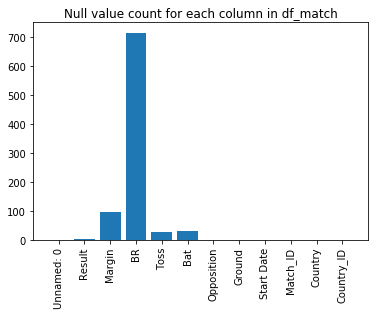

In [9]:
nulls = (df_match == "-").sum() + (df_match.isnull().sum())
print(nulls)

plt.bar(x=nulls.index, height=nulls.values)
plt.xticks(rotation=90);
plt.title("Null value count for each column in df_match");

### `df_match` cleanliness
- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `BR` non-descriptive name for "Balls Remaining"
- `BR` has 606 null value entries
- "-" is used in place of NaN in `Margin`, `Toss`, `Bat` and `Result` columns
- `Start Date` not in datetime format.
- `Result`, `Toss`, `Bat` columns should be categorical type instead of object.
- `Match_ID` has common prefix "ODI #".
- some `Match_ID` values have suffix "a".
- `Margin` has "runs" and "wickets" suffixes to describe the winning method. Need to separate these to convert to integer.
- `Opposition` column has common prefix "v _Country_"
- `Result` has multiple entries likely to mean match abandoned. \['n/r', 'aban', 'canc'\].
- 563 matches are represented by 2 rows of data, 196 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.

### `df_totals` Cleanliness

Now lets assess the structure and cleanliness of `df_totals`.

In [10]:
df_totals.head(25)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
5,1076,305/5,50.0,6.10,NaN,1,won,v Sri Lanka,Melbourne,11 Jan 2013,ODI # 3317,Australia,2
6,682,316/9,50.0,6.32,326.0,2,lost,v England,Rajkot,11 Jan 2013,ODI # 3318,India,6
7,836,325/4,50.0,6.50,NaN,1,won,v India,Rajkot,11 Jan 2013,ODI # 3318,England,1
8,118,172/2,40.1,4.28,171.0,2,won,v Australia,Adelaide,13 Jan 2013,ODI # 3319,SriLanka,8
9,1077,170,46.5,3.62,NaN,1,lost,v Sri Lanka,Adelaide,13 Jan 2013,ODI # 3319,Australia,2


- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `Result` and `RPO` have "-" in place of NaN values
- `Inns` is a non-descriptive term for "innings batted".
- `Match_ID` has common prefix "ODI #".
- `Opposition` column has common prefix "v _Country_"

In [11]:
df_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
Unnamed: 0    1296 non-null int64
Score         1296 non-null object
Overs         1296 non-null float64
RPO           1296 non-null object
Target        620 non-null float64
Inns          1296 non-null int64
Result        1296 non-null object
Opposition    1296 non-null object
Ground        1296 non-null object
Start Date    1296 non-null object
Match_ID      1296 non-null object
Country       1296 non-null object
Country_ID    1296 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 131.7+ KB


- `Score` is type object because it is sometimes given in the format "###/#" where the number after "/" is the amount of wickets lost. 
- `Target` has 676 NaN values because the team batting first does not have a target score.
- `RPO` is type object, should by type float.
- `Start Date` not in datetime format.
- `Result`, `Inns` columns should be categorical type.

In [12]:
print(df_totals.Country.unique(), '\n\n' ,df_totals.Opposition.unique())

['Pakistan' 'India' 'SriLanka' 'Australia' 'England' 'SouthAfrica'
 'Newzealad' 'WestIndies' 'Afghanistan' 'Bangladesh'] 

 ['v India' 'v Pakistan' 'v Australia' 'v Sri Lanka' 'v England'
 'v New Zealand' 'v South Africa' 'v West Indies' 'v Zimbabwe'
 'v Scotland' 'v Bangladesh' 'v Ireland' 'v Netherlands' 'v Kenya'
 'v Afghanistan' 'v Hong Kong' 'v U.A.E.' 'v P.N.G.']


- Inconsistent naming for countries and opposition e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.

In [13]:
df_totals.Inns.value_counts()

1    656
2    620
0     20
Name: Inns, dtype: int64

- `Inns` has some zero values associated with abandoned matches

In [14]:
df_totals.Match_ID.duplicated().sum(), df_totals.shape[0] - df_totals.Match_ID.duplicated(keep=False).sum()

(554, 188)

- 554 matches are represented by 2 rows of data, and 188 matches are represented by a single row of data. Somedata can be inferred from the single row but some might be missing.

Unnamed: 0      0
Score           0
Overs           0
RPO            20
Target        676
Inns            0
Result          3
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64


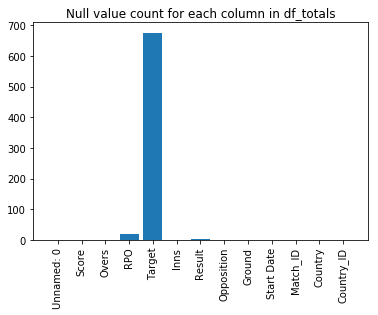

In [15]:
nulls = (df_totals == "-").sum() + df_totals.isnull().sum()
print(nulls)
plt.bar(x=nulls.index, height=nulls.values);
plt.xticks(rotation=90);
plt.title("Null value count for each column in df_totals");

## Assessment Summary
***
### `df_match` cleanliness
- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `BR` non-descriptive name for "Balls Remaining"
- `BR` has 606 null value entries.
- "-" is used in place of NaN in `Margin`, `Toss`, `Bat` and `Result` columns
- `Start Date` not in datetime format.
- `Result`, `Toss`, `Bat` columns should be categorical type instead of object.
- `Match_ID` has common prefix "ODI #".
- some `Match_ID` values have suffix "a" associated with abandoned matches.
- `Margin` has "runs" and "wickets" suffixes to describe the winning method. Need to separate these to convert to integer.
- `Opposition` column has common prefix "v _Country_"
- `Result` has multiple entries likely to mean match abandoned. \['n/r', 'aban', 'canc'\].
- Inconsistent naming for countries and opposition e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.
- 563 matches are represented by 2 rows of data, 196 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.
- `BR` has a large amount of NaN values, but this missing data can be calculated from `df_totals['Overs']` column.
*** 

### `df_totals` Cleanliness
- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `Score` is type object because it is sometimes given in the format "###/#" where the number after "/" is the amount of wickets lost. 
- `Result` and `RPO` have "-" in place of NaN values
- `Target` has 676 NaN values because the team batting first does not have a target score.
- `Inns` is a non-descriptive term for "innings batted".
- `Inns` has some zero values associated with abandoned matches
- `RPO` is type object, should by type float.
- `Start Date` not in datetime format.
- `Result`, `Inns` columns should be categorical type.
- `Match_ID` has common prefix "ODI #".
- `Opposition` column has common prefix "v _Country_"
- Inconsistent naming for countries and opposition e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.
- 554 matches are represented by 2 rows of data, and 188 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.
***

### Tidiness
- Columns duplicated between `df_match` and `df_totals`: `Start Date`, `Ground`, `Match_ID`, `Country`, `Country_ID`, `Opposition`, `Result`.
- Some data across both tables can be inferred from other columns and therefore are not independant variables. Related columns: `Score`, `Overs`, `RPO`, `BR`, `Target`, `Margin`
- Data can be restructured into 2 tables with only the `Match_ID` column common between them. 
***
### Next Steps
 1. Restructure data so that we have 2 new DataFrames; `df_match_clean`, `df_totals_clean`.
     - `df_match_clean`:
         - columns: `match_id`, `start_date`, `team1`, `team2`, `ground`, `result`
         - Each match represented by a single row
         - `result` column will contain the winning team for all completed games that were not tied.
     - `df_totals_clean`:
         - columns: `match_id`, `team`, `opposition`, `toss`, `innings`, `score`, `overs`, `rpo`, `result`, `win_margin`, `win_method`
         - Each match will be represented by two rows of data, one for each team.
         - `result` column will contain "win, lose, draw, n/r" categorical data.
         <br>
         <br>
 2. Implement and test cleaning code on the `df_match_clean` and `df_totals_clean` to address cleanliness issues.

## Cleaning & Testing: `df_match`
***
In this section we will implement and test code to address all of the isssues in the assessment summary above. The functions implemented in this section are contained within the `clean_data` module. Firstly, we will create a path to import this module, then make a copy of `df_match` to maintain the integrity of the data.

We'll handle the issues summarised above in blocks. In each block we'll list the issues, define cleaning actions then implement and test the code.

In [16]:
import os
import sys
module_path = os.path.abspath(os.path.join("../src"))

if module_path not in sys.path:
    sys.path.append(module_path)

assert '/home/ding/coding/machine_learning/ODI_cricket/src' in sys.path

from data import clean_data as clean

df_match_clean = df_match.copy()

### Assessment
 - Column names include capital letters and whitsepace characters.
 - `Opposition` column has common prefix "v _Country_"
 - Inconsistent naming for `countries` and `opposition` e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.
***
### Define
 - Make all column names lower case with whitsepace characters replaced with "_".
 - Remove the "v _Country_" prefix from the `opposition` column before this step. We'll do this with string slicing.
 - Replace "Newzealad" with "New Zealand"
 - Insert space at each capital letter in the country name.
***
### Code & Test

In [17]:
clean.formatHeaders(df_match_clean)

assert all([i.islower() and len(i.split(' ')) == 1 for i in df_match_clean.columns])

df_match_clean.head()

,unnamed:_0,result,margin,br,toss,bat,opposition,ground,start_date,match_id,country,country_id
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [18]:
# Remove "v " prefix
df_match_clean['opposition'] = np.where(df_match_clean['opposition'].str.startswith('v'),
                                        df_match_clean['opposition'].str[2:], df_match_clean['opposition'])

# Make country names conisistent with correct spelling
df_match_clean.opposition = df_match_clean.opposition.apply(clean.splitUpper)
df_match_clean.opposition = np.where(df_match_clean.opposition == "Newzealad", "New Zealand", df_match_clean.opposition)

df_match_clean.country = df_match_clean.country.apply(clean.splitUpper)
df_match_clean.country = np.where(df_match_clean.country == "Newzealad", "New Zealand", df_match_clean.country)

print(df_match_clean.opposition.unique(), "\n")
print(df_match_clean.country.unique())

['India' 'Pakistan' 'Australia' 'Sri Lanka' 'England' 'New Zealand'
 'South Africa' 'West Indies' 'Zimbabwe' 'Scotland' 'Bangladesh' 'Ireland'
 'Netherlands' 'Kenya' 'Afghanistan' 'Hong Kong' 'U. A. E.' 'P. N. G.'] 

['Pakistan' 'India' 'Sri Lanka' 'Australia' 'England' 'South Africa'
 'New Zealand' 'West Indies' 'Afghanistan' 'Bangladesh']


### Assessment
- Each match represented by a single row
- `Match_ID` has common prefix "ODI #".
- some `Match_ID` values have suffix "a" associated with abandoned matches.
***
### Define
- Drop rows where `match_id` has suffix 'a'.
- Drop duplicated `match_id` rows, keeping the first instance.
- Extract digits from the string using `.str.extract(regex)`.
***
### Code

In [19]:
df_match_clean = df_match_clean[~df_match_clean.match_id.str.endswith('a')]

drop_index = df_match_clean[df_match_clean.match_id.duplicated()].index
df_match_clean.drop(drop_index, axis=0, inplace=True)

assert not df_match_clean.match_id.duplicated().sum()

In [20]:
clean.matchPrefix(df_match_clean, 'match_id')

assert all([len(i) == 4 and type(i) == str for i in df_match_clean.match_id.values])

df_match_clean.head()

,unnamed:_0,result,margin,br,toss,bat,opposition,ground,start_date,match_id,country,country_id
0,418,won,85 runs,NaN,lost,1st,India,Kolkata,3 Jan 2013,3315,Pakistan,7
2,419,lost,10 runs,NaN,lost,2nd,India,Delhi,6 Jan 2013,3316,Pakistan,7
4,121,lost,107 runs,NaN,lost,2nd,Australia,Melbourne,11 Jan 2013,3317,Sri Lanka,8
6,694,lost,9 runs,NaN,lost,2nd,England,Rajkot,11 Jan 2013,3318,India,6
8,122,won,8 wickets,59.0,won,2nd,Australia,Adelaide,13 Jan 2013,3319,Sri Lanka,8


In [21]:
assert not df_match_clean.match_id.duplicated().sum()

### Assessment
 - `df_match_clean`:
     - columns: `match_id`, `start_date`, `team1`, `team2`, `ground`, `result`
     - `result` column will contain the winning team for all completed games that were not tied.
*** ***
### Define
 - Update `result` column to contain the winning team name using `np.where()`
 - Drop rows with duplicated match id's.
 - Drop columns: `unnamed:_0`, `margin`,`br`, `toss`, `bat`, `country_id` using `pd.drop()`
 - Rename `country` and `oppostion` to `team1` and `team2`.
 - Reorder columns: `match_id`, `start_date`, `team1`, `team2`, `ground`, `result`
 

In [22]:
df_match_clean['result'] = np.where(df_match_clean.result == "won", df_match_clean.country,
                                   np.where(df_match_clean.result == "lost", df_match_clean.opposition, df_match_clean.result))
df_match_clean.result.value_counts()

India           99
South Africa    82
England         80
New Zealand     73
Australia       73
Sri Lanka       63
Pakistan        61
Bangladesh      47
Afghanistan     46
West Indies     39
n/r             30
Zimbabwe        21
Ireland         11
tied             8
Scotland         3
U. A. E.         3
-                2
Hong Kong        1
Name: result, dtype: int64

In [23]:
old_names = ['country', 'opposition']
new_names = ['team1', 'team2']
        
clean.renameCols(df_match_clean, old_names, new_names)

df_match_clean.head(1)

,unnamed:_0,result,margin,br,toss,bat,team2,ground,start_date,match_id,team1,country_id
0,418,Pakistan,85 runs,NaN,lost,1st,India,Kolkata,3 Jan 2013,3315,Pakistan,7


In [24]:
drop_cols = ['unnamed:_0', 'margin','br', 'toss', 'bat', 'country_id']
df_match_clean.drop(drop_cols, axis=1, inplace=True)
df_match_clean.head(1)

,result,team2,ground,start_date,match_id,team1
0,Pakistan,India,Kolkata,3 Jan 2013,3315,Pakistan


In [25]:
ordered_cols = ['match_id', 'start_date', 'team1', 'team2', 'ground', 'result']
df_match_clean = df_match_clean[ordered_cols]
df_match_clean.head()

,match_id,start_date,team1,team2,ground,result
0,3315,3 Jan 2013,Pakistan,India,Kolkata,Pakistan
2,3316,6 Jan 2013,Pakistan,India,Delhi,India
4,3317,11 Jan 2013,Sri Lanka,Australia,Melbourne,Australia
6,3318,11 Jan 2013,India,England,Rajkot,England
8,3319,13 Jan 2013,Sri Lanka,Australia,Adelaide,Sri Lanka


### Assessment
- `Result` has multiple entries likely to mean match abandoned. \['n/r', 'aban', 'canc'\].
***
### Define
- Set all values in the list to 'n/r' using `np.where()`
***
### Code

In [26]:
no_results = ['n/r', 'aban', 'canc']

clean.commonValue(df_match_clean, 'result', no_results, 'n/r')

for val in no_results[1:]:
    assert all(df_match_clean.result != val)
    
df_match_clean.result.value_counts()

India           99
South Africa    82
England         80
New Zealand     73
Australia       73
Sri Lanka       63
Pakistan        61
Bangladesh      47
Afghanistan     46
West Indies     39
n/r             30
Zimbabwe        21
Ireland         11
tied             8
Scotland         3
U. A. E.         3
-                2
Hong Kong        1
Name: result, dtype: int64

### Assessment
- "-" is used in place of NaN in `Margin`, `Toss`, `Bat` and `Result` columns
***
### Define
- Set all "-" values in `result` to np.NaN using `np.where()`
***
### Code

Lets first recalculate the '-' and `np.NaN` values in our dataset.

match_id      0
start_date    0
team1         0
team2         0
ground        0
result        2
dtype: int64 match_id      0
start_date    0
team1         0
team2         0
ground        0
result        0
dtype: int64


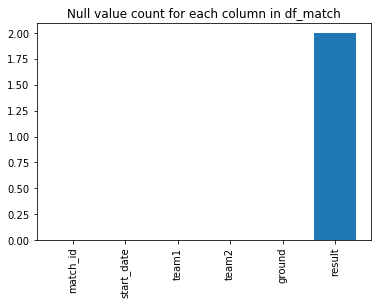

In [27]:
print((df_match_clean == '-').sum(), (df_match_clean.isnull().sum()))

nulls = (df_match_clean == "-").sum() + (df_match_clean.isnull().sum())
plt.bar(x=nulls.index, height=nulls.values)
plt.xticks(rotation=90);
plt.title("Null value count for each column in df_match");

We now only have 2 "-" values in the `result` column, and no NaN's so lets drop these 2 rows from the dataset.

In [28]:
df_match_clean = df_match_clean[~(df_match_clean.result == "-")]

assert all((df_match_clean.result != "-") | (df_match_clean.result.notnull()))

### Assessment
- `Start Date` not in datetime format.
***
### Define
- Change datatype from object to datetime using `pd.to_datetime()`
***
### Code

In [29]:
df_match_clean.start_date = pd.to_datetime(df_match_clean.start_date)

In [30]:
df_match_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 1316
Data columns (total 6 columns):
match_id      740 non-null object
start_date    740 non-null datetime64[ns]
team1         740 non-null object
team2         740 non-null object
ground        740 non-null object
result        740 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 40.5+ KB


We have now addressed all of the issues highlighted in the assessment summary for `df_match` so we can write this as a new .csv file.

In [31]:
df_match_clean.to_csv('../Data/interim/ODI_match_clean.csv', index=False)

In [32]:
df_match_clean.head()

,match_id,start_date,team1,team2,ground,result
0,3315,2013-01-03,Pakistan,India,Kolkata,Pakistan
2,3316,2013-01-06,Pakistan,India,Delhi,India
4,3317,2013-01-11,Sri Lanka,Australia,Melbourne,Australia
6,3318,2013-01-11,India,England,Rajkot,England
8,3319,2013-01-13,Sri Lanka,Australia,Adelaide,Sri Lanka


## Cleaning & Testing: `df_totals`
***
In this section we will implement and test code to address all of the isssues in the assessment summary above. We will need to gather some additional data to represent each match innings as 2 rows. The functions required to do this are contained within `gather` module accessed by the same path as the `clean_data` module. Firstly, we will import this module, then make a copy of `df_totals` to maintain the integrity of the data.

We'll handle the issues summarised above in blocks. In each block we'll list the issues, define cleaning actions then implement and test the code.

### `df_totals` Cleanliness
- Column names include capital letters and whitsepace characters.
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `Score` is type object because it is sometimes given in the format "###/#" where the number after "/" is the amount of wickets lost. 
- `Result` and `RPO` have "-" in place of NaN values
- `Target` has 676 NaN values because the team batting first does not have a target score.
- `Inns` is a non-descriptive term for "innings batted".
- `Inns` has some zero values associated with abandoned matches
- `RPO` is type object, should by type float.
- `Start Date` not in datetime format.
- `Result`, `Inns` columns should be categorical type.
- `Match_ID` has common prefix "ODI #".
- `Opposition` column has common prefix "v _Country_"
- 554 matches are represented by 2 rows of data, and 188 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.
***
### Tidiness
- Columns duplicated between `df_match` and `df_totals`: `Start Date`, `Ground`, `Match_ID`, `Country`, `Country_ID`, `Opposition`, `Result`.
- Some data across both tables can be inferred from other columns and therefore are not independant variables. Related columns: `Score`, `Overs`, `RPO`, `BR`, `Target`, `Margin`
- Data can be restructured into 2 tables with only the `Match_ID` column common between them. 
***
### Next Steps
 1. Restructure data so that we have 2 new DataFrames; `df_match_clean`, `df_totals_clean`.
     - `df_match_clean`:
         - columns: `match_id`, `start_date`, `team1`, `team2`, `ground`, `result`
         - Each match represented by a single row
         - `result` column will contain the winning team for all completed games that were not tied.
     - `df_totals_clean`:
         - columns: `match_id`, `team`, `opposition`, `toss`, `innings`, `score`, `overs`, `rpo`, `result`, `win_margin`, `win_method`
         - Each match will be represented by two rows of data, one for each team.
         - `result` column will contain "win, lose, draw, n/r" categorical data.
         <br>
         <br>
 2. Implement and test cleaning code on the `df_match_clean` and `df_totals_clean` to address cleanliness issues.

### Assessment
- Column names include capital letters and whitsepace characters.
- 554 matches are represented by 2 rows of data, and 188 matches are represented by a single row of data. Most data can be inferred from the single row but some might be missing.
***
### Define
- Implement `formatHeaders()` to make columns easier to work with.
- Gather missing data from https://www.espncricinfo.com
     - Requests and BeautifulSoup libraries are imported in clean_data
     
***
### Code


In [33]:
# Import gather_data module
from data import gather_data as gather

# Create df copies for cleaning
df_totals_clean = df_totals.copy()
df_match_copy = df_match.copy()

In [34]:
df_totals_clean.head(2)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [35]:
df_match_copy.head(2)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [36]:
df_list = [df_match_copy, df_totals_clean]

for df in df_list:
    clean.formatHeaders(df)
    
assert all([i.islower() and len(i.split(" ")) == 1 for i in df_totals_clean.columns])
assert all([i.islower() and len(i.split(" ")) == 1 for i in df_match_copy.columns])

df_totals_clean.head(1)

,unnamed:_0,score,overs,rpo,target,inns,result,opposition,ground,start_date,match_id,country,country_id
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7


In [37]:
import re

# Get soup from initial url
soup = gather.getSoup("http://stats.espncricinfo.com/ci/content/records/307851.html")

# Get all relative links from soup
all_links = gather.yearPageLinks(soup)

# Filter on links in target years
years = ["2013", "2014", "2015", "2016","2017","2018","2019"]
filt_links = gather.filterLinks(all_links, years)

# Get absolute links from relative links
prefix = "http://stats.espncricinfo.com/"
abs_links = gather.absoluteUrl(prefix, filt_links)

# Get match_ids represented by 1 row
match_ids = df_totals_clean[~df_totals_clean.match_id.duplicated(keep=False)].match_id.values

# Get scorecard links associated to each match_id
rel_sc_links = gather.scorecardLinks(abs_links, match_ids)
prefix = "https://www.espncricinfo.com/"
abs_sc_links = gather.absoluteUrl(prefix, rel_sc_links)

# Check we have links for all match_ids
assert len(match_ids) == len(abs_sc_links)

In [38]:
score_master = {'match_id':[], 'country':[], 'score':[], 'detailed_score':[]}

# Extract missing information from urls
for url in abs_sc_links:
   score_dct = gather.getMissingData(url)
   for key in score_dct:
      score_master[key].extend(score_dct[key])
            
# Create df from score_master dct
df = pd.DataFrame(data=score_master, columns=['match_id', 'country', 'score', 'detailed_score'])

# Test that we have 2 entries for every match_id
assert df.shape[0] == 2*len(match_ids)
assert all(df.match_id.duplicated(keep=False))

['ODI no. 3337']
['ODI no. 3339']
['ODI no. 3340']
['ODI no. 3341']
['ODI no. 3342']
['ODI no. 3353']
['ODI no. 3354']
['ODI no. 3355']
['ODI no. 3356']
['ODI no. 3357']
['ODI no. 3358']
['ODI no. 3359']
['ODI no. 3395']
['ODI no. 3397']
['ODI no. 3399']
['ODI no. 3402']
['ODI no. 3403']
['ODI no. 3404']
['ODI no. 3406']
['ODI no. 3408']
['ODI no. 3409']
['ODI no. 3410']
['ODI no. 3417']
['ODI no. 3418']
['ODI no. 3472']
['ODI no. 3487']
['ODI no. 3488']
['ODI no. 3490']
['ODI no. 3491']
['ODI no. 3503']
['ODI no. 3504']
['ODI no. 3505']
['ODI no. 3506']
['ODI no. 3507']
['ODI no. 3508']
['ODI no. 3510']
['ODI no. 3513']
['ODI no. 3518']
['ODI no. 3521']
['ODI no. 3524']
['ODI no. 3550']
['ODI no. 3552']
['ODI no. 3553']
['ODI no. 3555']
['ODI no. 3556']
['ODI no. 3558']
['ODI no. 3559']
['ODI no. 3560']
['ODI no. 3562']
['ODI no. 3572']
['ODI no. 3573']
['ODI no. 3576']
['ODI no. 3581']
['ODI no. 3601']
['ODI no. 3603']
['ODI no. 3604']
['ODI no. 3611']
['ODI no. 3612']
['ODI no. 3614

In [40]:
df.to_csv('../Data/interim/missing_totals_data.csv', index=False)

In [41]:
df_totals_missing = pd.read_csv('../Data/interim/missing_totals_data.csv')
df_totals_missing_clean = df_totals_missing.copy()
df_totals_missing_clean.head()

,match_id,country,score,detailed_score
0,ODI no. 3337,West Indies,337/4,"337/4 (50 Overs, RR: 6.74)"
1,ODI no. 3337,Zimbabwe,181/9,"181/9 (50 Overs, RR: 3.62)"
2,ODI no. 3339,Zimbabwe,273/8,"273/8 (50 Overs, RR: 5.46)"
3,ODI no. 3339,West Indies,274/3,"274/3 (49 Overs, RR: 5.59)"
4,ODI no. 3340,Zimbabwe,211/9,"211/9 (50 Overs, RR: 4.22)"


In [42]:
clean.formatHeaders(df)
assert all([i.islower() and len(i.split(" ")) == 1 for i in df_totals_missing_clean.columns])

In [43]:
df_totals_missing_clean.head(2)

,match_id,country,score,detailed_score
0,ODI no. 3337,West Indies,337/4,"337/4 (50 Overs, RR: 6.74)"
1,ODI no. 3337,Zimbabwe,181/9,"181/9 (50 Overs, RR: 3.62)"


In [44]:
df_totals_missing_clean[df_totals_missing.score.isnull()]

,match_id,country,score,detailed_score
142,ODI no. 3650,Ireland,NaN,NaN
143,ODI no. 3650,England,NaN,NaN
206,ODI no. 3759,Afghanistan,NaN,NaN
207,ODI no. 3759,Scotland,NaN,NaN
228,ODI no. 3807,Zimbabwe,NaN,NaN
229,ODI no. 3807,Sri Lanka,NaN,NaN
258,ODI no. 3866,Bangladesh,NaN,NaN
259,ODI no. 3866,Ireland,NaN,NaN
356,ODI no. 4101,Afghanistan,NaN,NaN
357,ODI no. 4101,Ireland,NaN,NaN


There are 5 matches where we could not collect score information which we will drop before merging. 
Lets also tidy the dataframe by extracting the information we want from `detailed_score` before data merging. We will also need to drop the corresponding match ids from `dt_totals_clean`

In [45]:
msg_match_ids = df_totals_missing_clean[df_totals_missing.score.isnull()].match_id.values
df_totals_missing_clean = df_totals_missing_clean[df_totals_missing.score.notnull()]

In [46]:
df_totals_missing_clean['overs'] = df_totals_missing_clean.detailed_score.str.extract('\((\d+)').astype(float)
df_totals_missing_clean['rpo'] = df_totals_missing_clean.detailed_score.str.extract(': (\d\.\d+)').astype(float)
df_totals_missing_clean.drop('detailed_score', axis=1, inplace=True)

In [47]:
df_totals_missing_clean.head(4)

,match_id,country,score,overs,rpo
0,ODI no. 3337,West Indies,337/4,50.0,6.74
1,ODI no. 3337,Zimbabwe,181/9,50.0,3.62
2,ODI no. 3339,Zimbabwe,273/8,50.0,5.46
3,ODI no. 3339,West Indies,274/3,49.0,5.59


### Assessment
- `Match_ID` has common prefix "ODI no.".
- 554 matches are represented by 2 rows of data, and 188 matches are represented by a single row of data.
- Restructure data so that we have 2 new DataFrames; `df_match_clean`, `df_totals_clean`.
     - `df_totals_clean`:
         - columns: `match_id`, `team`, `opposition`, `toss`, `innings`, `score`, `overs`, `rpo`, `result`, `win_margin`, `win_method`
         - Each match will be represented by two rows of data, one for each team innings.
         - `result` column will contain "win, lose, draw, n/r" categorical data.
- Inconsistent naming for `countries` and `opposition` e.g. Sri Lanka & SriLanka, New Zealand & Newzealad. Not all double barrelled country names are sepearated with a space.

***
### Define
- Extract numeric digits from match_id columns in `df_totals_clean` and `df_totals_missing_clean` to make the values column across all tables.
- Merge `toss`, `bat`, `margin` columns from `df_match_copy` into `df_totals_clean` aligned on `match_id` and `country` usind `pd.merge()`. Left join to retain only match ids that are in `df_totals_clean` 
- Append missing data in `df_totals_missing_clean` into `df_totals_clean` on `match_id` and `country` using `pd.merge()`. Join must be outer to include the new missing rows.
- Replace "Newzealad" with "New Zealand"
- Insert space at each capital letter in the country name.
***
### Code


In [48]:
# Remove match_ids for abandoned matches as we did earlier
df_match_copy = df_match_copy[~df_match_copy.match_id.str.endswith('a')]

df_list = [df_match_copy, df_totals_clean, df_totals_missing_clean]

for df in df_list:
    clean.matchPrefix(df, 'match_id')
    
assert all([len(i) == 4 and type(i) == str for i in df_match_copy.match_id.values])
assert all([len(i) == 4 and type(i) == str for i in df_totals_clean.match_id.values])
assert all([len(i) == 4 and type(i) == str for i in df_totals_missing_clean.match_id.values])

df_totals_clean.match_id.values

array(['3315', '3315', '3316', ..., '4139', '4140', '4140'], dtype=object)

Before merging on match id and team it is important that the country names are equivalet in both dataframes. Currently `df_totals_missing_clean` has a space in double-barrelled country names, whilst `df_totals_clean` has no spaces and some spelling errors with "Newzealad". We'll change the country names in `df_merge` and to remain consistent we'll need to change the country names in `df_match` also.

In [49]:
for df in df_list:
    df.country = np.where(df.country == 'Newzealad', 'NewZealand', df.country)
    df.country = df.country.apply(clean.splitUpper)
    
# df_match and df_totals countries should be equal
assert sorted(df_match_copy.country.unique()) == sorted(df_totals_clean.country.unique())
# df_totals has more countries but names should be consistent
assert all([i in sorted(df_totals_missing_clean.country.unique()) for i in df_match_copy.country.unique()])

df_totals_missing_clean.country.unique()

array(['West Indies', 'Zimbabwe', 'Scotland', 'Afghanistan', 'Bangladesh',
       'Pakistan', 'Ireland', 'South Africa', 'Netherlands', 'India',
       'England', 'Australia', 'Kenya', 'Hong Kong',
       'United Arab Emirates', 'Sri Lanka', 'New Zealand',
       'Papua New Guinea'], dtype=object)

In [50]:
msg_match_ids = [i[-4:] for i in msg_match_ids]
df_totals_clean = df_totals_clean[~df_totals_clean.match_id.isin(msg_match_ids)]

In [51]:
df_match_copy.head()

,unnamed:_0,result,margin,br,toss,bat,opposition,ground,start_date,match_id,country,country_id
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,3317,Sri Lanka,8


In [52]:
df_merge = df_totals_missing_clean.merge(df_totals_clean, on=['match_id','country'], how='outer', suffixes=['','_t'])

# Check all match_ids are duplicated exactly once
assert df_merge.match_id.duplicated().sum() == df_merge.shape[0]/2

df_merge.head()

,match_id,country,score,overs,rpo,unnamed:_0,score_t,overs_t,rpo_t,target,inns,result,opposition,ground,start_date,country_id
0,3337,West Indies,337/4,50.0,6.74,6.0,337/4,50.0,6.74,NaN,1.0,won,v Zimbabwe,St George's,22 Feb 2013,4.0
1,3337,Zimbabwe,181/9,50.0,3.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3339,Zimbabwe,273/8,50.0,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3339,West Indies,274/3,49.0,5.59,7.0,274/3,49.0,5.59,274.0,2.0,won,v Zimbabwe,St George's,24 Feb 2013,4.0
4,3340,Zimbabwe,211/9,50.0,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_merge.match_id.duplicated().sum(), df_merge.shape[0]/2

(737, 737.0)

In [54]:
df_totals_missing_clean.shape[0],df_totals_missing_clean.match_id.duplicated().sum()
df_merge[~df_merge.match_id.duplicated(keep=False)]

,match_id,country,score,overs,rpo,unnamed:_0,score_t,overs_t,rpo_t,target,inns,result,opposition,ground,start_date,country_id


In [55]:
df_merge = df_merge.merge(df_match_copy.loc[:, ['match_id', 'country', 'margin', 'toss', 'bat', 'result']], \
                                        on=['match_id','country'], how='left', suffixes=['','_m'])

# ensure that `result` and `result_m` align 
assert all(df_merge.result.notnull() == df_merge.result_m.notnull())

In [56]:
df_merge.head()

,match_id,country,score,overs,rpo,unnamed:_0,score_t,overs_t,rpo_t,target,inns,result,opposition,ground,start_date,country_id,margin,toss,bat,result_m
0,3337,West Indies,337/4,50.0,6.74,6.0,337/4,50.0,6.74,NaN,1.0,won,v Zimbabwe,St George's,22 Feb 2013,4.0,156 runs,lost,1st,won
1,3337,Zimbabwe,181/9,50.0,3.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3339,Zimbabwe,273/8,50.0,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3339,West Indies,274/3,49.0,5.59,7.0,274/3,49.0,5.59,274.0,2.0,won,v Zimbabwe,St George's,24 Feb 2013,4.0,7 wickets,lost,2nd,won
4,3340,Zimbabwe,211/9,50.0,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 20 columns):
match_id      1474 non-null object
country       1474 non-null object
score         366 non-null object
overs         366 non-null float64
rpo           366 non-null float64
unnamed:_0    1291 non-null float64
score_t       1291 non-null object
overs_t       1291 non-null float64
rpo_t         1291 non-null object
target        620 non-null float64
inns          1291 non-null float64
result        1291 non-null object
opposition    1291 non-null object
ground        1291 non-null object
start_date    1291 non-null object
country_id    1291 non-null float64
margin        1291 non-null object
toss          1291 non-null object
bat           1291 non-null object
result_m      1291 non-null object
dtypes: float64(7), object(13)
memory usage: 241.8+ KB


We have created a large number of NaN values through performing the outer merge. Each match id that did not exist in the original `df_totals` has a row with completed information and a row with missing information. We can complete this missing data by implying from the completed row. We'll define a function to do this.

Columns we need to fill to achieve our desired structure are: `opposition`, `toss`, `innings`, `result`, `margin`, `start_date`.


In [58]:
def fillMissingData(df, idx_list):
    for i in idx_list:
        if df.loc[i,'match_id'] == df.loc[i+1,'match_id']:
            row = i+1
        elif df.loc[i,'match_id'] == df.loc[i-1,'match_id']:
            row = i-1
        else:
            print("Match ID does not preceed or superceed index")


        df.loc[i,'inns'] = np.where(df.loc[row, 'inns']==1, 2.0, 1.0)
        if df.loc[row, 'result'] == 'won':
            df.loc[i, 'result'] = 'lost'
        elif df.loc[row, 'result'] == 'lost':
            df.loc[i, 'result'] = 'won'
        else:
            df.loc[i, 'result'] = df.loc[row, 'result']

        if df.loc[row, 'bat'] == '1st':
            df.loc[i, 'bat'] = '2nd'
        elif df.loc[row, 'bat'] == '2nd':
            df.loc[i, 'bat'] = '1st'

        if df.loc[row, 'toss'] == 'won':
            df.loc[i, 'toss'] = 'lost'
        elif df.loc[row, 'toss'] == 'lost':
            df.loc[i, 'toss'] = 'won'

        df.loc[i,'opposition'] = df.loc[row, 'country']
        df.loc[i, 'start_date'] = df.loc[row, 'start_date']
        df.loc[i,'margin'] = df.loc[row, 'margin']
            

In [59]:
idx = df_merge[df_merge.score_t.isnull()].index
fillMissingData(df_merge, idx)

# fill nans
nan_cols = ['score', 'overs', 'rpo']
for col in nan_cols:
    df_merge[col] = np.where(df_merge[col].isnull(), df_merge[col+"_t"], df_merge[col])

assert all(df_merge.result.notnull())
assert all(df_merge.bat.notnull())
assert all(df_merge.toss.notnull())
assert all(df_merge.opposition.notnull())
assert all(df_merge.start_date.notnull())
assert all(df_merge.margin.notnull())
assert all(df_merge.score.notnull())
assert all(df_merge.rpo.notnull())
assert all(df_merge.overs.notnull())

In [60]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 20 columns):
match_id      1474 non-null object
country       1474 non-null object
score         1474 non-null object
overs         1474 non-null float64
rpo           1474 non-null object
unnamed:_0    1291 non-null float64
score_t       1291 non-null object
overs_t       1291 non-null float64
rpo_t         1291 non-null object
target        620 non-null float64
inns          1474 non-null float64
result        1474 non-null object
opposition    1474 non-null object
ground        1291 non-null object
start_date    1474 non-null object
country_id    1291 non-null float64
margin        1474 non-null object
toss          1474 non-null object
bat           1474 non-null object
result_m      1291 non-null object
dtypes: float64(6), object(14)
memory usage: 281.8+ KB


In [61]:
df_totals_clean = df_merge.copy()

All match ids are represented by 2 rows and we have filled in all of the missing data that we need. We can now address the remaining cleaning tasks we highlighted earlier, plus additional issues created during data collection and merging.

### Assessment
- `Unnamed: 0` appears to be an old index which is no longer useful.
- `Score` is type object because it is sometimes given in the format "###/#" where the number after "/" is the amount of wickets lost. 
- `Result` and `RPO` have "-" in place of NaN values
- `Target` has 676 NaN values because the team batting first does not have a target score.
- `Inns` is a non-descriptive term for "innings batted".
- `Inns` has some zero values associated with abandoned matches
- `RPO` is type object, should by type float.
- `Start Date` not in datetime format.
- `Result`, `Inns` columns should be categorical type.
- `Opposition` column has prefix "v _Country_"
- `margin` is type object and describes win by runs and win by wickets
- `result` has 4 rows with `NaN` values
***
### Define
- Restructure data `df_totals_clean`:
     - columns: `match_id`, `team`, `opposition`, `toss`, `innings`, `score`, `overs`, `rpo`, `result`, `win_margin`, `win_method`
     - Each match will be represented by two rows of data, one for each team.
     - `result` column will contain "win, lose, draw, n/r" categorical data.
- Split `score` column into `score_total` and `wickets` using RegEx
- Replace "-" with `np.NaN` for all object type colums
- Update datatypes of `start_date`, `result`, `inns`, `bat`, 
- Remove prefix "v _Country_" from `opposition` using string slicing
- Split margin into `margin` into `result_margin` and `result_method`
- Update rows with `result` `NaN` values

In [62]:
keep_cols = ['match_id', 'start_date', 'country', 'toss', 'bat', 
             'inns','opposition', 'score', 'overs', 'rpo', 'result', 'margin']

df_totals_clean = df_totals_clean[keep_cols]

In [63]:
print(clean.countVal(df_totals_clean, "-"))
clean.replaceNaN(df_totals_clean, '-')
print(clean.countVal(df_totals_clean, "-"))

[{'match_id': 0}, {'start_date': 0}, {'country': 0}, {'toss': 0}, {'bat': 4}, {'opposition': 0}, {'score': 0}, {'rpo': 18.0}, {'result': 4}, {'margin': 70}]
[{'match_id': 0}, {'start_date': 0}, {'country': 0}, {'toss': 0}, {'bat': 0.0}, {'opposition': 0}, {'score': 0}, {'rpo': 0.0}, {'result': 0.0}, {'margin': 0.0}]


In [64]:
df_totals_clean[df_totals_clean.result.isnull()]

,match_id,start_date,country,toss,bat,inns,opposition,score,overs,rpo,result,margin
364,4139,19 May 2019,Ireland,lost,1st,1.0,Afghanistan,210,48.0,4.3,NaN,NaN
365,4139,19 May 2019,Afghanistan,won,2nd,2.0,v Ireland,138,35.0,3.86,NaN,NaN
1472,4140,19 May 2019,Pakistan,lost,2nd,2.0,v England,193/6,31.5,6.06,NaN,NaN
1473,4140,19 May 2019,England,won,1st,1.0,v Pakistan,351/9,50.0,7.02,NaN,NaN


The results of both games are available at these links: [4139](https://www.espncricinfo.com/series/19064/scorecard/1168515/ireland-vs-afghanistan-1st-odi-afg-in-ireland-2019), [4140](https://www.espncricinfo.com/series/18664/scorecard/1152845/england-vs-pakistan-5th-odi-wc-warm-up-2019)

We can therefore update the `NaN` values manually.

In [66]:
df_totals_clean.loc[[364,1472],'result'] = 'won'
df_totals_clean.loc[[365,1473],'result'] = 'lost'

df_totals_clean.loc[[364,365],'margin'] = '72 runs'

df_totals_clean.loc[[1472],'score'] = '297'
df_totals_clean.loc[[1472],'overs'] = '46.5'
df_totals_clean.loc[[1472],'rpo'] = '6.34'
df_totals_clean.loc[[1472,1473],'margin'] = '54 runs'

In [67]:
df_totals_clean.loc[[364,365,1472,1473],:]

,match_id,start_date,country,toss,bat,inns,opposition,score,overs,rpo,result,margin
364,4139,19 May 2019,Ireland,lost,1st,1.0,Afghanistan,210,48,4.3,won,72 runs
365,4139,19 May 2019,Afghanistan,won,2nd,2.0,v Ireland,138,35,3.86,lost,72 runs
1472,4140,19 May 2019,Pakistan,lost,2nd,2.0,v England,297,46.5,6.34,won,54 runs
1473,4140,19 May 2019,England,won,1st,1.0,v Pakistan,351/9,50,7.02,lost,54 runs


In [68]:
# Split score column
df_totals_clean['score_total'] = df_totals_clean.score.str.extract('(\d+)').astype(float)
df_totals_clean['wickets'] = df_totals_clean.score.str.extract('\/(\d+)').astype(float)

# Innings with 10 wickets lost not documented in the format ###/# so we replace NaN with 10
df_totals_clean['wickets'] = np.where(df_totals_clean.wickets.isnull(), int(10), (df_totals_clean.wickets))
df_totals_clean.wickets = df_totals_clean.wickets.astype(int)

df_totals_clean.head()

,match_id,start_date,country,toss,bat,inns,opposition,score,overs,rpo,result,margin,score_total,wickets
0,3337,22 Feb 2013,West Indies,lost,1st,1.0,v Zimbabwe,337/4,50,6.74,won,156 runs,337.0,4
1,3337,22 Feb 2013,Zimbabwe,won,2nd,2.0,West Indies,181/9,50,3.62,lost,156 runs,181.0,9
2,3339,24 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,273/8,50,5.46,lost,7 wickets,273.0,8
3,3339,24 Feb 2013,West Indies,lost,2nd,2.0,v Zimbabwe,274/3,49,5.59,won,7 wickets,274.0,3
4,3340,26 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,211/9,50,4.22,lost,5 wickets,211.0,9


In [69]:
clean.splitCol(df_totals_clean, 'margin', 'result_margin', 'result_method')
df_totals_clean.head()

,match_id,start_date,country,toss,bat,inns,opposition,score,overs,rpo,result,score_total,wickets,result_margin,result_method
0,3337,22 Feb 2013,West Indies,lost,1st,1.0,v Zimbabwe,337/4,50,6.74,won,337.0,4,156.0,runs
1,3337,22 Feb 2013,Zimbabwe,won,2nd,2.0,West Indies,181/9,50,3.62,lost,181.0,9,156.0,runs
2,3339,24 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,273/8,50,5.46,lost,273.0,8,7.0,wickets
3,3339,24 Feb 2013,West Indies,lost,2nd,2.0,v Zimbabwe,274/3,49,5.59,won,274.0,3,7.0,wickets
4,3340,26 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,211/9,50,4.22,lost,211.0,9,5.0,wickets


In [70]:
df_totals_clean.bat = np.where(df_totals_clean.inns == 0, 'DNB', df_totals_clean.bat)

assert all(df_totals_clean.bat.value_counts().values == df_totals_clean.inns.value_counts().values)
df_totals_clean.bat.value_counts()

1st    735
2nd    721
DNB     18
Name: bat, dtype: int64

In [71]:
# Remove opposition prefix
df_totals_clean.opposition = np.where(df_totals_clean.opposition.str.startswith('v'), 
                                     df_totals_clean.opposition.str[2:], df_totals_clean.opposition)

assert not all(df_totals_clean.opposition.str.startswith('v'))
df_totals_clean.head()

,match_id,start_date,country,toss,bat,inns,opposition,score,overs,rpo,result,score_total,wickets,result_margin,result_method
0,3337,22 Feb 2013,West Indies,lost,1st,1.0,Zimbabwe,337/4,50,6.74,won,337.0,4,156.0,runs
1,3337,22 Feb 2013,Zimbabwe,won,2nd,2.0,West Indies,181/9,50,3.62,lost,181.0,9,156.0,runs
2,3339,24 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,273/8,50,5.46,lost,273.0,8,7.0,wickets
3,3339,24 Feb 2013,West Indies,lost,2nd,2.0,Zimbabwe,274/3,49,5.59,won,274.0,3,7.0,wickets
4,3340,26 Feb 2013,Zimbabwe,won,1st,1.0,West Indies,211/9,50,4.22,lost,211.0,9,5.0,wickets


In [72]:
# Update datatypes
df_totals_clean.start_date = pd.to_datetime(df_totals_clean.start_date)
df_totals_clean.rpo = df_totals_clean.rpo.astype(float)

cat_cols = ['result_method', 'bat', 'toss', 'opposition', 'country', 'result']
for col in cat_cols:
    df_totals_clean[col] = df_totals_clean[col].astype('category')
    
df_totals_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 15 columns):
match_id         1474 non-null object
start_date       1474 non-null datetime64[ns]
country          1474 non-null category
toss             1474 non-null category
bat              1474 non-null category
inns             1474 non-null float64
opposition       1474 non-null category
score            1474 non-null object
overs            1474 non-null object
rpo              1456 non-null float64
result           1474 non-null category
score_total      1456 non-null float64
wickets          1474 non-null int64
result_margin    1408 non-null float64
result_method    1408 non-null category
dtypes: category(6), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 165.8+ KB


In [73]:
cols = ['match_id', 'start_date', 'country', 'toss', 'bat', 'opposition', 'score_total', 'wickets',
        'overs', 'rpo', 'result', 'result_margin', 'result_method']

df_totals_clean = df_totals_clean[cols]
df_totals_clean.head()

,match_id,start_date,country,toss,bat,opposition,score_total,wickets,overs,rpo,result,result_margin,result_method
0,3337,2013-02-22,West Indies,lost,1st,Zimbabwe,337.0,4,50,6.74,won,156.0,runs
1,3337,2013-02-22,Zimbabwe,won,2nd,West Indies,181.0,9,50,3.62,lost,156.0,runs
2,3339,2013-02-24,Zimbabwe,won,1st,West Indies,273.0,8,50,5.46,lost,7.0,wickets
3,3339,2013-02-24,West Indies,lost,2nd,Zimbabwe,274.0,3,49,5.59,won,7.0,wickets
4,3340,2013-02-26,Zimbabwe,won,1st,West Indies,211.0,9,50,4.22,lost,5.0,wickets


In [75]:
df_totals_clean.to_csv('../Data/interim/ODI_totals_clean.csv', index=False)